<a href="https://colab.research.google.com/github/MirzaRafaRaidhitya/PPAS-MP1/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/badminton_worldtour.csv')

In [ ]:
df


,Unnamed: 0,Player,Category,Matches,Wins,Losses,pts_for,pts_agst,win_pct,shot_pct
0,1,Aaron CHIA,Doubles,17,14,3,781,658,0.823529,0.542738
1,2,Adnan MAULANA,Doubles,1,1,0,62,54,1.000000,0.534483
2,3,Akane YAMAGUCHI,Singles,78,54,24,3732,3337,0.692308,0.527939
3,4,Akira KOGA,Doubles,7,5,2,355,327,0.714286,0.520528
4,5,Alex LANIER,Singles,3,2,1,171,171,0.666667,0.500000
...,...,...,...,...,...,...,...,...,...,...
180,181,ZHANG Nan,Doubles,3,2,1,136,122,0.666667,0.527132
181,182,ZHANG Shuxian,Doubles,10,7,3,454,382,0.700000,0.543062
182,183,ZHAO Junpeng,Singles,3,2,1,136,119,0.666667,0.533333
183,184,ZHENG Siwei,Doubles,128,107,21,6042,4787,0.835938,0.557946


In [ ]:
datakosong = df.isnull().sum()
datakosong[datakosong > 0]

,0


VISUALISASI DATA

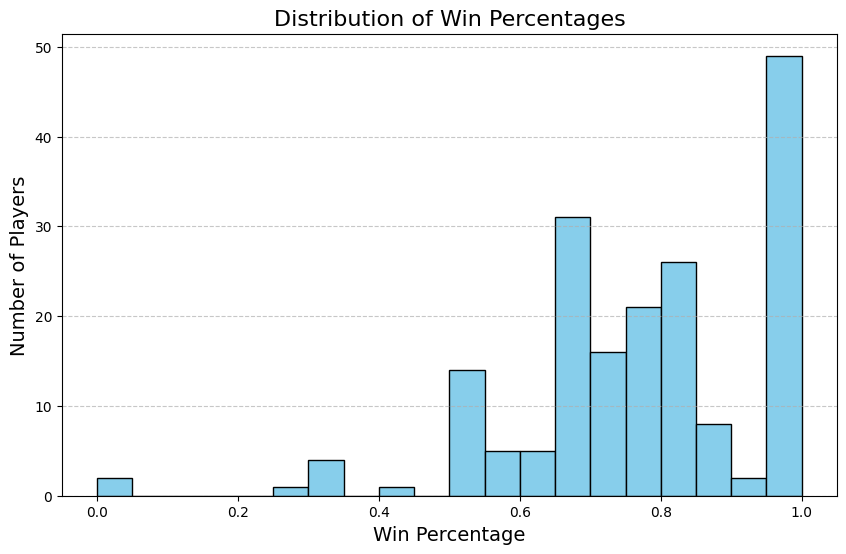

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' holds your DataFrame, replace 'data' with 'df'
plt.figure(figsize=(10, 6))
plt.hist(df['win_pct'], bins=20, color='skyblue', edgecolor='black') # Changed 'data' to 'df'
plt.title('Distribution of Win Percentages', fontsize=16)
plt.xlabel('Win Percentage', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

PREPPROCESSING DATASET

In [ ]:
# Drop the unnecessary columns "Unnamed: 0" and "Player"
df_cleaned = df.drop(columns=['Unnamed: 0', 'Player'])

# Display the cleaned dataset's first few rows and summary
df_cleaned.head(), df_cleaned.describe()

(  Category  Matches  Wins  Losses  pts_for  pts_agst   win_pct  shot_pct
 0  Doubles       17    14       3      781       658  0.823529  0.542738
 1  Doubles        1     1       0       62        54  1.000000  0.534483
 2  Singles       78    54      24     3732      3337  0.692308  0.527939
 3  Doubles        7     5       2      355       327  0.714286  0.520528
 4  Singles        3     2       1      171       171  0.666667  0.500000,
           Matches        Wins      Losses      pts_for     pts_agst  \
 count  185.000000  185.000000  185.000000   185.000000   185.000000   
 mean    13.902703   10.756757    3.145946   667.156757   570.372973   
 std     19.651896   15.837499    4.177488   925.201096   769.003595   
 min      1.000000    0.000000    0.000000    62.000000    47.000000   
 25%      3.000000    2.000000    0.000000   154.000000   134.000000   
 50%      5.000000    4.000000    2.000000   266.000000   223.000000   
 75%     17.000000   13.000000    4.000000   804.00

PREDIKSI DATA WIN RATE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining features (X) and target (y)
X = df_cleaned.drop(columns=['Wins'])
y = df_cleaned['Wins']

# One-hot encode the 'Category' column to handle categorical data
X = pd.get_dummies(X, columns=['Category'], drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and display the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(5.172388819979967e-26, 1.0)

VISUALISASI NEAREST NEIGHBOURS

In [ ]:
import numpy as np # Import the NumPy library with the alias 'np'

# Calculate the correlation matrix to examine the relationships between features and the target "Wins"
# Select only numerical columns for correlation calculation
numerical_columns = df_cleaned.select_dtypes(include=np.number).columns
correlation_matrix = df_cleaned[numerical_columns].corr()

# Extract correlations of 'Wins' with other features
correlation_with_wins = correlation_matrix['Wins'].sort_values(ascending=False)
correlation_with_wins

,Wins
Wins,1.000000
Matches,0.995338
pts_for,0.994170
pts_agst,0.987592
Losses,0.891154
shot_pct,0.245043
win_pct,0.064224


KALKULASI DISTANCE / EUCLIDEAN DISTANCE

In [ ]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import pandas as pd # Import pandas

# Assuming 'df_cleaned' is the DataFrame you want to use, replace 'data' with 'df_cleaned'
wins = df_cleaned[['Wins']].values

# Compute the Euclidean distance matrix
distance_matrix = squareform(pdist(wins, metric='euclidean'))

# Convert the matrix to a DataFrame for better readability
# Replace 'data' with 'df_cleaned' for index and columns
distance_df = pd.DataFrame(distance_matrix, index=df_cleaned.index, columns=df_cleaned.index)

# Display a portion of the distance matrix
distance_df.iloc[:10, :10]  # Showing only the first 10x10 for clarity


,0,1,2,3,4,5,6,7,8,9
0,0.0,13.0,40.0,9.0,12.0,14.0,12.0,12.0,3.0,10.0
1,13.0,0.0,53.0,4.0,1.0,1.0,1.0,1.0,16.0,23.0
2,40.0,53.0,0.0,49.0,52.0,54.0,52.0,52.0,37.0,30.0
3,9.0,4.0,49.0,0.0,3.0,5.0,3.0,3.0,12.0,19.0
4,12.0,1.0,52.0,3.0,0.0,2.0,0.0,0.0,15.0,22.0
5,14.0,1.0,54.0,5.0,2.0,0.0,2.0,2.0,17.0,24.0
6,12.0,1.0,52.0,3.0,0.0,2.0,0.0,0.0,15.0,22.0
7,12.0,1.0,52.0,3.0,0.0,2.0,0.0,0.0,15.0,22.0
8,3.0,16.0,37.0,12.0,15.0,17.0,15.0,15.0,0.0,7.0
9,10.0,23.0,30.0,19.0,22.0,24.0,22.0,22.0,7.0,0.0


TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd # Ensure pandas is imported

# Assuming df_cleaned is your DataFrame
# Step 1: Create a target column for classification based on win_pct
df_cleaned['performance_category'] = pd.cut(
    df_cleaned['win_pct'],  # Use df_cleaned instead of 'data'
    bins=[-float('inf'), 0.5, 0.75, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Step 2: Select features and target
features = ['Matches', 'Wins', 'Losses', 'pts_for', 'pts_agst']
X = df_cleaned[features]  # Use df_cleaned instead of 'data'
y = df_cleaned['performance_category']  # Use df_cleaned instead of 'data'

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix, accuracy, class_report

(array([[ 1,  3,  0],
        [ 0, 13,  2],
        [ 0,  0, 18]]),
 0.8648648648648649,
 '              precision    recall  f1-score   support\n\n        High       0.90      1.00      0.95        18\n         Low       1.00      0.25      0.40         4\n      Medium       0.81      0.87      0.84        15\n\n    accuracy                           0.86        37\n   macro avg       0.90      0.71      0.73        37\nweighted avg       0.88      0.86      0.84        37\n')

ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 86.49%


PRECISSION

In [ ]:
from sklearn.metrics import precision_score

# Menghitung precision untuk setiap kelas
precision = precision_score(y_test, y_pred, average=None, labels=['Low', 'Medium', 'High'])
print(f"Precision per kelas: Low={precision[0]:.2f}, Medium={precision[1]:.2f}, High={precision[2]:.2f}")

RECALL

In [ ]:
from sklearn.metrics import recall_score

# Menghitung recall untuk setiap kelas
recall = recall_score(y_test, y_pred, average=None, labels=['Low', 'Medium', 'High'])
print(f"Recall per kelas: Low={recall[0]:.2f}, Medium={recall[1]:.2f}, High={recall[2]:.2f}")


Recall per kelas: Low=0.25, Medium=0.87, High=1.00


F1-SCORE

In [ ]:
from sklearn.metrics import f1_score

# Menghitung F1-Score untuk setiap kelas
f1 = f1_score(y_test, y_pred, average=None, labels=['Low', 'Medium', 'High'])
print(f"F1-Score per kelas: Low={f1[0]:.2f}, Medium={f1[1]:.2f}, High={f1[2]:.2f}")


F1-Score per kelas: Low=0.40, Medium=0.84, High=0.95


CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

# Menghasilkan classification report
report = classification_report(y_test, y_pred, labels=['Low', 'Medium', 'High'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         Low       1.00      0.25      0.40         4
      Medium       0.81      0.87      0.84        15
        High       0.90      1.00      0.95        18

    accuracy                           0.86        37
   macro avg       0.90      0.71      0.73        37
weighted avg       0.88      0.86      0.84        37



MATTHEWS CORRELATION COEFFICIENT (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Menghitung MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")


Matthews Correlation Coefficient (MCC): 0.77
